In [1]:
!pip install pandas --quiet

In [2]:
import sys

In [3]:
!pip install opendatasets --upgrade --quiet

In [4]:
dataset_url = 'https://www.kaggle.com/camnugent/sandp500'

In [5]:
import opendatasets as od

In [6]:
od.download(dataset_url)

Skipping, found downloaded files in ".\sandp500" (use force=True to force download)


In [7]:
import os

In [8]:
data_dir = './sandp500'

In [9]:
os.listdir(data_dir)

['all_stocks_5yr.csv', 'getSandP.py', 'individual_stocks_5yr', 'merge.sh']

In [10]:
train_csv = data_dir + '/all_stocks_5yr.csv'

In [11]:
!pip install pandas

In [12]:
import pandas as pd

In [13]:
raw_df = pd.read_csv(train_csv)
raw_df

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


In [14]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [15]:
raw_df.dropna(subset=['close', 'low', 'high', 'open', 'volume'], inplace=True) #dropna eliminates any value with null value

In [16]:
raw_df.info() #the null values were eliminated as the row of items decrease to 619029

<class 'pandas.core.frame.DataFrame'>
Int64Index: 619029 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619029 non-null  object 
 1   open    619029 non-null  float64
 2   high    619029 non-null  float64
 3   low     619029 non-null  float64
 4   close   619029 non-null  float64
 5   volume  619029 non-null  int64  
 6   Name    619029 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 37.8+ MB


In [17]:
raw_df.describe()

,open,high,low,close,volume
count,619029.000000,619029.000000,619029.000000,619029.000000,6.190290e+05
mean,83.023334,83.778419,82.256200,83.043305,4.321892e+06
std,97.378769,98.207735,96.507634,97.388913,8.693671e+06
min,1.620000,1.690000,1.500000,1.590000,1.010000e+02
25%,40.220000,40.620000,39.830000,40.240800,1.070351e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082165e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284550e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [18]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [20]:
raw_df.close.corr(raw_df.open)

0.9998719317422582

In [21]:
raw_df.close.corr(raw_df.high)

0.9999363707838036

In [22]:
raw_df.close.corr(raw_df.low)

0.9999391836701348

In [23]:
raw_df.close.corr(raw_df.volume)

-0.14280236369618454

In [24]:
raw_df.corr() # It appears the low as the most correlation with the close stock price

,open,high,low,close,volume
open,1.000000,0.999939,0.999928,0.999872,-0.142705
high,0.999939,1.000000,0.999903,0.999936,-0.142316
low,0.999928,0.999903,1.000000,0.999939,-0.143240
close,0.999872,0.999936,0.999939,1.000000,-0.142802
volume,-0.142705,-0.142316,-0.143240,-0.142802,1.000000


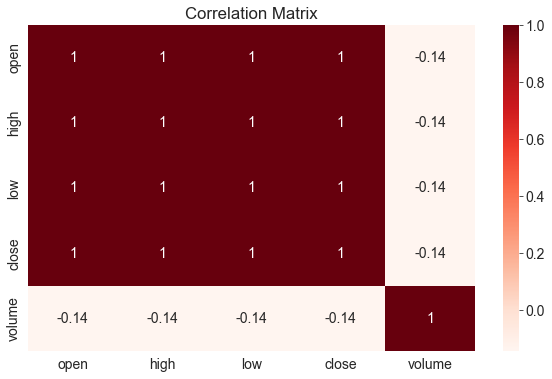

In [25]:
sns.heatmap(raw_df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

In [26]:
def estimate_close(low, w, b):
    return w * low + b

In [27]:
w = 50
b = 100

In [28]:
low = raw_df.low
estimated_close = estimate_close(low, w, b)

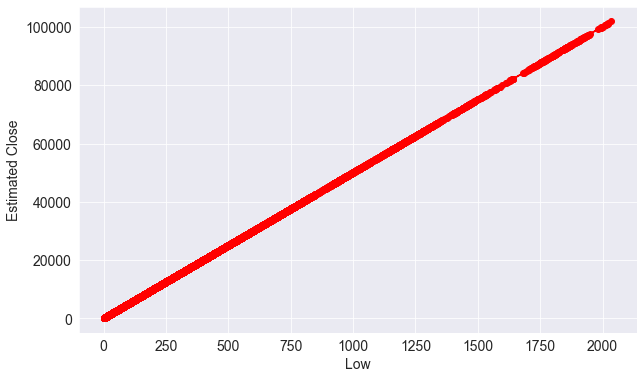

In [29]:
plt.plot(low, estimated_close, 'r-o');
plt.xlabel('Low');
plt.ylabel('Estimated Close');

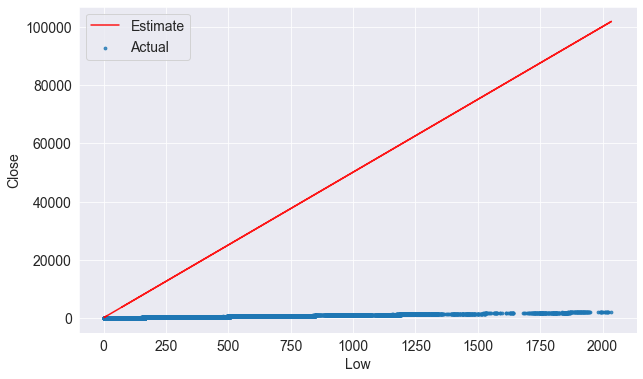

In [30]:
target = raw_df.close

plt.plot(low, estimated_close, 'r', alpha=0.9);
plt.scatter(low, target, s=8,alpha=0.8);
plt.xlabel('Low');
plt.ylabel('Close')
plt.legend(['Estimate', 'Actual']);

In [31]:
def try_parameters(w, b):
    low = raw_df.low
    target = raw_df.close
    
    estimated_close = estimate_close(low, w, b)
    
    plt.plot(low, estimated_close, 'r', alpha=0.9);
    plt.scatter(low, target, s=8,alpha=0.8);
    plt.xlabel('Low');
    plt.ylabel('Close')
    plt.legend(['Estimate', 'Actual']);

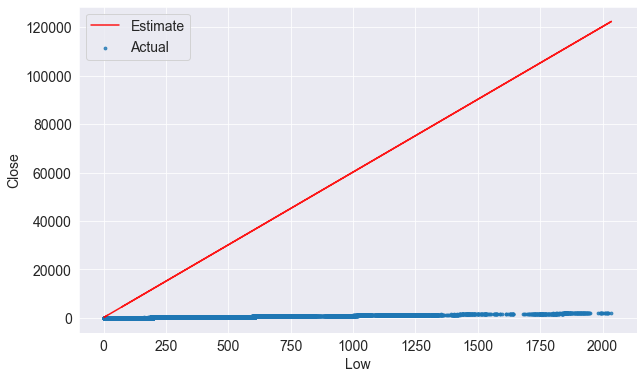

In [32]:
try_parameters(60, 200)

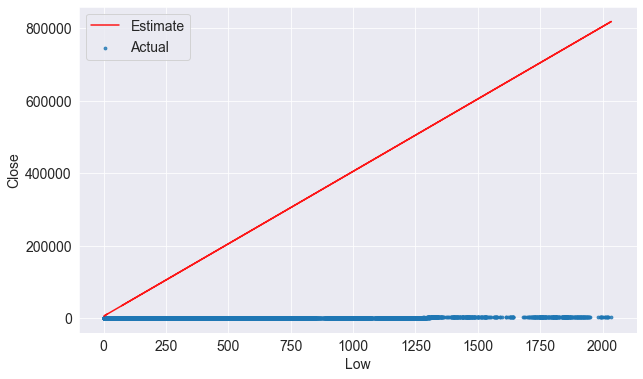

In [33]:
try_parameters(400, 5000)

In [34]:
!pip install numpy --quiet

In [35]:
import numpy as np

In [36]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [37]:
w = 50
b = 100

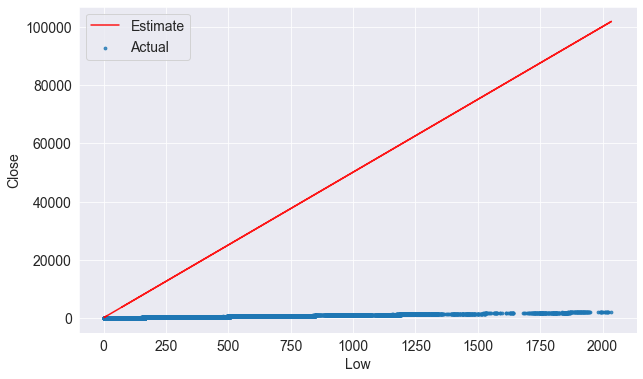

In [38]:
try_parameters(w, b)

In [39]:
targets = raw_df['close']
predicted = estimate_close(raw_df.low, w, b)

In [40]:
rmse(targets, predicted)

6277.651607663703

In [41]:
def try_parameters(w, b):
    low = raw_df.low
    target = raw_df.close
    predictions = estimate_close(low, w, b)
    
    plt.plot(low, predictions, 'r', alpha=0.9);
    plt.scatter(low, target, s=8,alpha=0.8);
    plt.xlabel('Low');
    plt.ylabel('Close')
    plt.legend(['Prediction', 'Actual']);
    
    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  6277.651607663703


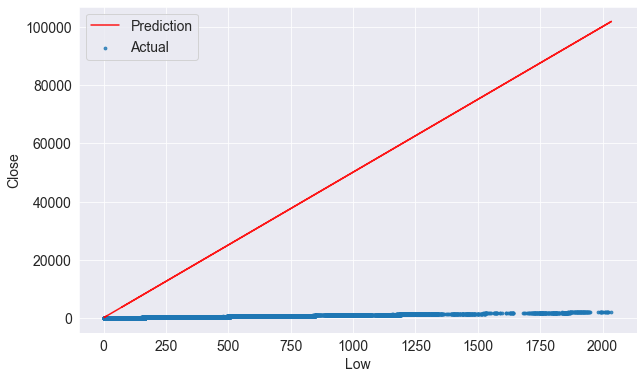

In [42]:
try_parameters(50, 100)

In [43]:
!pip install scikit-learn --quiet

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
model = LinearRegression() # Using the LinearRegression class from scikit-learn to find close " using the ordinary least squares 
# optimization technique which is better for smaller datasets while Stochastic gradient descent better for larger datasets

In [46]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [47]:
inputs = raw_df[['close']] # Not that the input X must be a 2-d array, so we'll need to pass a dataframe, instead of a single column.
targets = raw_df.close
print('inputs.shape :', inputs.shape)
print('targes.shape :', targets.shape)


inputs.shape : (619029, 1)
targes.shape : (619029,)


In [48]:
model.fit(inputs, targets)

LinearRegression()

In [49]:
model.predict(np.array([[0], 
                        [1], 
                        [2]]))

C:\Users\viengkeo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-7.10542736e-14,  1.00000000e+00,  2.00000000e+00])

In [50]:
predictions = model.predict(inputs)

In [51]:
predictions

array([14.75, 14.46, 14.27, ..., 73.83, 73.27, 73.86])

In [52]:
rmse(targets, predictions)

8.757808611172746e-14

In [53]:
# w
model.coef_

array([1.])

In [54]:
# b
model.intercept_

-7.105427357601002e-14

RMSE Loss:  1.5935439357619499


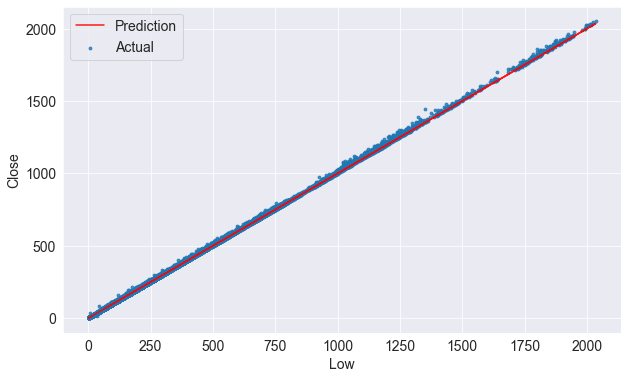

In [55]:
try_parameters(model.coef_, model.intercept_)

In [56]:
# Create inputs and targets
inputs, targets = raw_df[['low']], raw_df['close']

In [57]:
# Create and train the model
model = LinearRegression().fit(inputs, targets)

In [58]:
# Generate predictions
predictions = model.predict(inputs)

In [59]:
# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 1.0740578337780426


In [60]:
# Create inputs and targets
inputs, targets = raw_df[['low', 'volume']], raw_df['close']

In [61]:
# Create and train the model
model = LinearRegression().fit(inputs, targets)

In [62]:
# Generate predictions
predictions = model.predict(inputs)

In [63]:
# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 1.0732285115010216


In [64]:
raw_df.close.corr(raw_df.volume)

-0.14280236369618454

In [65]:
model.coef_, model.intercept_

(array([1.00913362e+00, 4.90462143e-09]), 0.014611571211801788)

In [66]:
raw_df.close.corr(raw_df.high)

0.9999363707838036

In [67]:
# Create inputs and targets
inputs, targets = raw_df[['low', 'volume', 'high']], raw_df['close']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 0.849766770603333
